In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, 'lib')
from lib.read_data import *

In [3]:
N = 1024
frame = 23
num_ritz = 1600
path = f"data/circles_solid_N{N}_200"

A = readA_sparse(f"{path}/A_{frame}.bin") #.astype(np.float32)
# A = sparse.load_npz(f"{path}/A_{frame}.npz")
rhs = load_vector(f"{path}/div_v_star_{frame}.bin") #.astype(np.float32)
sol = load_vector(f"{path}/pressure_{frame}.bin") #.astype(np.float32)
flags = read_flags(f"{path}/flags_{frame}.bin")
# flags = np.load(f"{path}/flags_{frame}.npy")
# ritz_vecs = np.load(f"data/full_domain/N128/ritz_200.npy")
# ritz_vecs = np.load(f"{path}/preprocessed/{frame}/fourier.npy")
ritz_vecs = np.load(f"{path}/preprocessed/{frame}/ritz_{num_ritz}.npy")

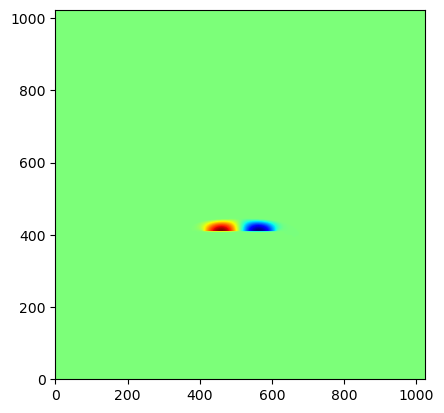

In [8]:
ritz_full = np.zeros(N*N)
ritz_full[np.where(flags==2)] = ritz_vecs[1]

plt.imshow(ritz_full.reshape(N,N).T, origin='lower', cmap='jet')

In [9]:
r = compressedVec(rhs, flags) - compressedMat(A, flags) @ compressedVec(sol, flags)
np.linalg.norm(r)

9.992341131486547e-06

In [10]:
# ritz_comp = ritz_vecs[:, np.argwhere(flags==2).ravel()]
ritz_comp = ritz_vecs

/tmp/ipykernel_217578/263346654.py:1: RuntimeWarning: invalid value encountered in divide
  eigs = compressedMat(A, flags) @ ritz_comp.T / ritz_comp.T


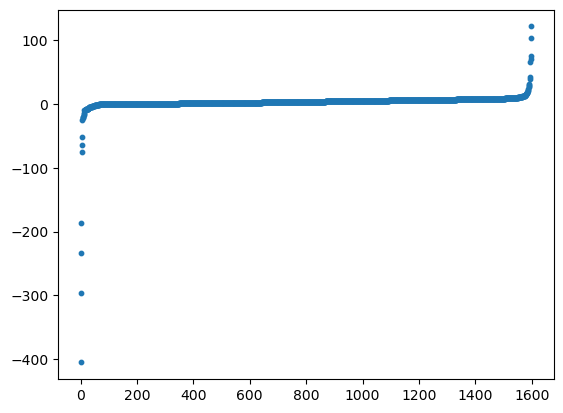

In [11]:
eigs = compressedMat(A, flags) @ ritz_comp.T / ritz_comp.T
eig = sorted(eigs[0])
plt.scatter(range(len(eigs[0])), eig, s=10);

In [12]:
# path = f"data/dambreak_N128_200"
# rhs = load_vector(f"{path}/div_v_star_10.bin")
rhs_comp = compressedVec(rhs, flags)
# rhs_comp = np.random.rand(*rhs_comp.shape)
# rhs_comp = rhs_comp / np.linalg.norm(rhs_comp)
coeffs = ritz_comp @ rhs_comp
rhs_left = rhs_comp - coeffs @ ritz_comp
np.linalg.norm(rhs_left)/np.linalg.norm(rhs_comp)

6.948791582441021e-14

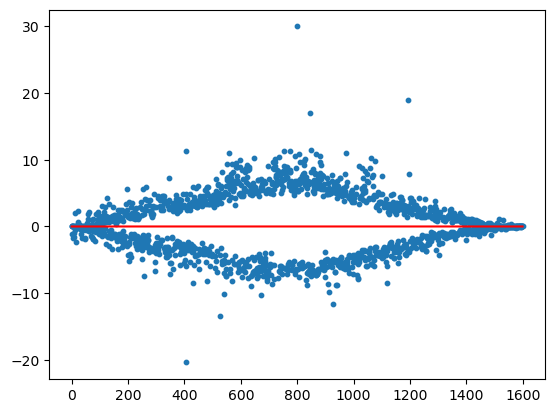

In [13]:
plt.plot(np.zeros(len(coeffs)), c='r')
plt.scatter(range(len(coeffs)), coeffs, s=10);

In [14]:
import torch
r = torch.load('r_52.pt').cpu().numpy()
r_comp = compressedVec(r, flags)
coeffs_r = ritz_vecs @ r_comp
r_left = r_comp - coeffs @ ritz_vecs
left_norm = np.linalg.norm(r_left)/np.linalg.norm(r_comp)
print(left_norm)
plt.plot(np.zeros(len(coeffs)), c='r')
plt.scatter(range(len(coeffs)), coeffs_r, s=10)

FileNotFoundError: [Errno 2] No such file or directory: 'r_52.pt'

In [ ]:
for i in range(17):
# i = 1
    r = np.load(f"res_{i}.npy")
    r_comp = compressedVec(r, flags)
    coeffs_r = ritz_vecs @ r_comp
    print(np.linalg.norm(coeffs_r), end=', ')
    r_left = r_comp - coeffs @ ritz_vecs
    left_norm = np.linalg.norm(r_left)/np.linalg.norm(r_comp)
    print(left_norm)
    # plt.plot(np.zeros(len(coeffs_r)), c='r')
    # plt.scatter(range(len(coeffs_r)), coeffs_r, s=10)